In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

In [2]:
M1 = np.loadtxt(open("ConjugateGradient/M1.csv", "rb"), delimiter=",")
M2 = np.loadtxt(open("ConjugateGradient/M2.csv", "rb"), delimiter=",")

b1 = np.loadtxt(open("ConjugateGradient/b1.csv", "rb"), delimiter=",")
b2 = np.loadtxt(open("ConjugateGradient/b2.csv", "rb"), delimiter=",")

xstar = np.loadtxt(open("ConjugateGradient/x.csv", "rb"), delimiter=",")

In [3]:
M = np.vstack((M1,M2))
b = np.concatenate((b1, b2))
T = 200

In [4]:
def error(M, x, xstar):
    
    err_ = np.dot(x - xstar, np.dot(M, x - xstar))
    
    err = la.norm(err_)**2
    return err

In [9]:
x = np.zeros(xstar.shape)

M1_error = []
M2_error = []

#M1_error.append(error(M1, x, xstar))
#M2_error.append(error(M2, x, xstar))

A = np.dot(M.T, M)
c = np.dot(M.T, b)
r = c
p = r
for i in range(T):
    alpha = np.dot(r,r)/np.dot(p, np.dot(A, p))
    x = x + alpha*p
    rold = r
    r = r - alpha*np.dot(A,p)
    beta = np.dot(r,r)/np.dot(rold, rold)
    p = r + beta*p
    
    M1_error.append(error(M1, x, xstar))
    M2_error.append(error(M2, x, xstar))

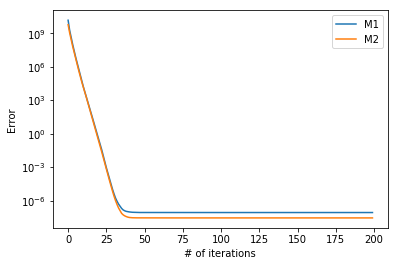

In [10]:
%matplotlib inline
plt.yscale('log')
plt.plot(M1_error, label="M1")
plt.plot(M2_error, label="M2")
plt.xlabel("# of iterations")
plt.ylabel("Error")
plt.legend()